# Extensions to Linear Models - Lab

## Introduction

In this lab, you'll practice many concepts learned in this section, from adding interactions and polynomials to your model to AIC and BIC!

## Summary

You will be able to:
- Build a linear regression model with polynomial features/interactions
- Perform regularization
- Use AIC and BIC to select the best value for the regularization parameter


## Let's get started!

Import all the necessary packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import preprocessing

from sklearn.datasets import load_boston

## Look at a Baseline Boston Housing Data Model

Import the Boston housing data set, use all the predictors in their scaled version (using `preprocessing.scale`. Look at a baseline model using *scaled variables* as predictors. Use 5-fold cross-validation this time and use the $R^2$ score to evaluate the model.

In [2]:
# Your code here
boston = load_boston()
y = pd.DataFrame(boston.target,columns = ["target"])
x = pd.DataFrame(boston['data'], columns = boston.feature_names)
X_scaled = preprocessing.scale(x)
X_scaled = pd.DataFrame(X_scaled, columns = x.columns)

df = pd.concat([y, X_scaled], axis = 1)
df.head()

,target,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,21.6,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,34.7,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,33.4,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,36.2,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [3]:
regression = LinearRegression()

In [4]:
crossvalidation = KFold(n_splits = 5, random_state = 1, shuffle= True)
baseline = np.mean(cross_val_score(regression, X_scaled, y, cv = crossvalidation, scoring = 'r2'))

In [5]:
baseline

0.7176324491383005

## Include interactions

Look at all the possible combinations of variables for interactions by adding interactions one by one to the baseline model. Next, evaluate that model using 5-fold classification and store the $R^2$ to compare it with the baseline model.

You've created code for this before in the interactions lab, yet this time, you have scaled the variables so the outcomes may look different. 

Print the 7 most important interactions.

In [6]:
from itertools import combinations
combinations = list(combinations(boston.feature_names, 2))

interactions = []
data = X_scaled.copy()

for item in combinations:
    data["interaction"] = data[item[0]] * data[item[1]]
    score = np.mean(cross_val_score(regression, data, y, scoring="r2", cv=crossvalidation))
    if score > baseline: 
        interactions.append((item[0], item[1], score,3))
            
top_7 = sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7]
print(top_7)

[('RM', 'LSTAT', 0.7832165803604274, 3), ('RM', 'TAX', 0.7752514777398676, 3), ('RM', 'RAD', 0.7700767546577312, 3), ('RM', 'PTRATIO', 0.7635456330512321, 3), ('INDUS', 'RM', 0.7566187103630421, 3), ('NOX', 'RM', 0.7461351850787394, 3), ('RM', 'AGE', 0.7421152576041224, 3)]


Write code to include the 7 most important interactions in your data set by adding 7 columns. Name the columns "var1_var2" with var1 and var2 the two variables in the interaction.

In [7]:
# Your code here
df_inter = X_scaled.copy()
for interaction in top_7:
    df_inter[interaction[0] + '_' + interaction[1]] = df[interaction[0]] * df[interaction[1]]
df_inter.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,RM_LSTAT,RM_TAX,RM_RAD,RM_PTRATIO,INDUS_RM,NOX_RM,RM_AGE
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,-0.444930,-0.275757,-0.406574,-0.603547,-0.532772,-0.059659,-0.049646
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.095668,-0.191813,-0.168607,-0.058883,-0.115279,-0.143814,0.071331
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,-1.550451,-1.266461,-1.113245,-0.388783,-0.761138,-0.949544,-0.340960
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,-1.383713,-1.124148,-0.765197,0.114875,-1.328183,-0.848901,-0.823092
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,-1.261136,-1.358947,-0.925023,0.138869,-1.605599,-1.026210,-0.628023


## Include Polynomials

Try polynomials of 2, 3 and 4 for each variable, in a similar way you did for interactions (by looking at your baseline model and seeing how $R^2$ increases). Do understand that when going for a polynomial of 4, the particular column is raised to the power of 2 and 3 as well in other terms. We only want to include "pure" polynomials, so make sure no interactions are included. We want the result to return a list that contain tuples of the form:

`(var_name, degree, R2)`, so eg. `('DIS', 3, 0.732)`

In [8]:
from sklearn.preprocessing import PolynomialFeatures
polynomials = []

for col in X_scaled.columns:
    for degree in [2,3,4]:
        data = X_scaled.copy()
        poly = PolynomialFeatures(degree, include_bias=False)
        X = poly.fit_transform(df[[col]])
        data = data.drop(col, axis=1)
        data = pd.concat([data,pd.DataFrame(X)], axis = 1)
        score = np.mean(cross_val_score(regression, data, y, scoring="r2", cv=crossvalidation))
        if score > baseline: polynomials.append((col, degree, round(score,3)))
top_10 = sorted(polynomials, key=lambda x: x[2], reverse=True)[:10]
print(top_10)

[('RM', 4, 0.8), ('RM', 2, 0.782), ('LSTAT', 4, 0.782), ('RM', 3, 0.781), ('LSTAT', 3, 0.774), ('LSTAT', 2, 0.772), ('DIS', 3, 0.737), ('DIS', 2, 0.732), ('DIS', 4, 0.731), ('TAX', 4, 0.724)]


For each variable, print out the maximum R2 possible when including Polynomials.

In [9]:
# Your code here
polynom = pd.DataFrame(polynomials, columns = ['variable', 'degree','r2'])
polynom.head()
polynom.groupby(['variable'], sort = False).max()['r2']

variable
ZN         0.723
INDUS      0.723
CHAS       0.718
NOX        0.721
RM         0.800
AGE        0.722
DIS        0.737
RAD        0.719
TAX        0.724
PTRATIO    0.721
B          0.720
LSTAT      0.782
Name: r2, dtype: float64

In [10]:
polynom[polynom['variable'] == 'RM']

,variable,degree,r2
12,RM,2,0.782
13,RM,3,0.781
14,RM,4,0.800


In [11]:
polynom[polynom['variable'] == 'LSTAT']

,variable,degree,r2
30,LSTAT,2,0.772
31,LSTAT,3,0.774
32,LSTAT,4,0.782


Which two variables seem to benefit most from adding Polynomial terms?

RM and LSTAT

Add Polynomials for the two features that seem to benefit the most, as in have the best R squared compared to the baseline model. For each of the two feature, raise to the Polynomial that generates the best result. Make sure to start from the data set `df_inter` so the final data set has both interactions and polynomials in the model.

In [12]:
# Your code here

df_inter = X_scaled.copy()
for interaction in top_7:
    df_inter[interaction[0] + '_' + interaction[1]] = df[interaction[0]] * df[interaction[1]]

#trying first without column names to see what the dataframe looks like
for col in ['RM', 'LSTAT']:
    poly = PolynomialFeatures(4, include_bias = False) 
    X = pd.DataFrame(poly.fit_transform(df[[col]]))
    X = pd.DataFrame(poly.fit_transform(df[[col]]))
    df_inter = pd.concat([df_inter.drop(col, axis = 1), X], axis = 1)
    

In [13]:
df_inter.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,...,NOX_RM,RM_AGE,0,1,2,3,0,1,2,3
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,...,-0.059659,-0.049646,0.413672,0.171124,0.070789,0.029284,-1.075562,1.156834,-1.244247,1.338266
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.367166,0.557160,-0.867883,-0.987329,-0.303094,...,-0.143814,0.071331,0.194274,0.037743,0.007332,0.001425,-0.492439,0.242497,-0.119415,0.058805
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,...,-0.949544,-0.340960,1.282714,1.645354,2.110519,2.707191,-1.208727,1.461022,-1.765977,2.134585
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,-0.809889,1.077737,-0.752922,-1.106115,0.113032,...,-0.848901,-0.823092,1.016303,1.032871,1.049709,1.066822,-1.361517,1.853728,-2.523882,3.436308
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,-0.511180,1.077737,-0.752922,-1.106115,0.113032,...,-1.026210,-0.628023,1.228577,1.509401,1.854414,2.278290,-1.026501,1.053705,-1.081630,1.110295


In [27]:
# Your code here

df_inter = X_scaled.copy()
for interaction in top_7:
    df_inter[interaction[0] + '_' + interaction[1]] = df[interaction[0]] * df[interaction[1]]

#adding column names
for col in ['RM', 'LSTAT']:
    poly = PolynomialFeatures(4, include_bias = False) #best degree is 4 for both
    col_names = [col, col+'_'+'2', col+'_'+'3', col+'_'+'4']
    X = pd.DataFrame(poly.fit_transform(df[[col]]), columns = col_names)
    df_inter = pd.concat([df_inter.drop(col, axis = 1), X], axis = 1)
    

In [28]:
df_inter.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,...,NOX_RM,RM_AGE,RM,RM_2,RM_3,RM_4,LSTAT,LSTAT_2,LSTAT_3,LSTAT_4
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,...,-0.059659,-0.049646,0.413672,0.171124,0.070789,0.029284,-1.075562,1.156834,-1.244247,1.338266
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.367166,0.557160,-0.867883,-0.987329,-0.303094,...,-0.143814,0.071331,0.194274,0.037743,0.007332,0.001425,-0.492439,0.242497,-0.119415,0.058805
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,...,-0.949544,-0.340960,1.282714,1.645354,2.110519,2.707191,-1.208727,1.461022,-1.765977,2.134585
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,-0.809889,1.077737,-0.752922,-1.106115,0.113032,...,-0.848901,-0.823092,1.016303,1.032871,1.049709,1.066822,-1.361517,1.853728,-2.523882,3.436308
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,-0.511180,1.077737,-0.752922,-1.106115,0.113032,...,-1.026210,-0.628023,1.228577,1.509401,1.854414,2.278290,-1.026501,1.053705,-1.081630,1.110295


In [38]:
# Your code here

df_inter = X_scaled.copy()
for interaction in top_7:
    df_inter[interaction[0] + '_' + interaction[1]] = df[interaction[0]] * df[interaction[1]]

for col in ['RM', 'LSTAT']:
    poly = PolynomialFeatures(4, include_bias = False) # both RM and LSTAT have highest r2 with degree 4
    col_names = [col, col+'_'+'2', col+'_'+'3', col+'_'+'4']
    X = pd.DataFrame(poly.fit_transform(df[[col]]), columns = col_names)
    df_inter = pd.concat([df_inter.drop(col, axis = 1), X], axis = 1)
df_inter_1 = df_inter.copy()
df_inter_1 = df_inter.drop(['RM', 'RM_2', 'RM_3','LSTAT', 'LSTAT_2', 'LSTAT_3'], axis = 1)
    

In [39]:
df_inter_1.head()

,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,RM_LSTAT,RM_TAX,RM_RAD,RM_PTRATIO,INDUS_RM,NOX_RM,RM_AGE,RM_4,LSTAT_4
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-0.444930,-0.275757,-0.406574,-0.603547,-0.532772,-0.059659,-0.049646,0.029284,1.338266
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.095668,-0.191813,-0.168607,-0.058883,-0.115279,-0.143814,0.071331,0.001425,0.058805
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.550451,-1.266461,-1.113245,-0.388783,-0.761138,-0.949544,-0.340960,2.707191,2.134585
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.383713,-1.124148,-0.765197,0.114875,-1.328183,-0.848901,-0.823092,1.066822,3.436308
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.261136,-1.358947,-0.925023,0.138869,-1.605599,-1.026210,-0.628023,2.278290,1.110295


check out your final data set and make sure that your interaction terms as well as your polynomial terms are included.

## Full model R-squared

Check out the R-squared of the full model.

In [40]:
# Your code here
full_model_score = np.mean(cross_val_score(regression, df_inter, y, scoring = 'r2', cv = crossvalidation))
full_model_score

0.8061116489237066

In [41]:
full_model_score_1 = np.mean(cross_val_score(regression, df_inter_1, y, scoring = 'r2', cv = crossvalidation))
full_model_score_1

#using the model without removing the polynomial columns works better

0.6091759131831663

## Finding the best Lasso regularization parameter

You've learned that, when using Lasso regularization, your coefficients shrink to 0 when using a higher regularization parameter. Now the question is which value we should choose for the regularization parameter. 

This is where the AIC and BIC come in handy! We'll use both criteria in what follows and perform cross-validation to select an optimal value of the regularization parameter alpha of the Lasso estimator.

Read the page here: https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html and create a similar plot as the first one listed on the page. 

In [60]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoLarsIC

In [61]:
# Your code here

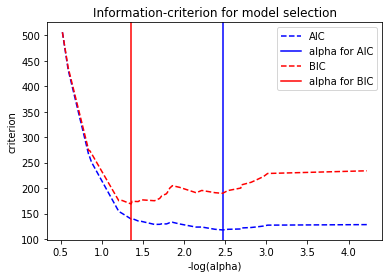

In [62]:
bic = LassoLarsIC(criterion = 'bic')
bic.fit(df_inter, y)
alpha_bic_ = bic.alpha_

aic = LassoLarsIC(criterion = 'aic')
aic.fit(df_inter,y)
alpha_aic_ = aic.alpha_

def plt_ic_criterion(model, name, color):
    alpha_ = model.alpha_
    alphas_ = model.alphas_
    criterion = model.criterion_
    plt.plot(-np.log10(alphas_), criterion, '--', color = color, label = name)
    plt.axvline(-np.log10(alpha_), color = color, label = 'alpha for ' + name)
    plt.xlabel('-log(alpha)')
    plt.ylabel('criterion')

plt.figure()
plt_ic_criterion(aic, 'AIC', 'blue')
plt_ic_criterion(bic, 'BIC', 'red')
plt.title('Information-criterion for model selection')
plt.legend()
plt.show()

## Analyze the final result

Finally, use the best value for regularization parameter according to AIC and BIC and compare the R squared parameters and MSE using train-test-split. Compare with the baseline model.

In [70]:
# Code for baseline model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import Lasso

# code for lasso with alpha from AIC
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print('training r2', linreg.score(X_train, y_train))
print('testing r2', linreg.score(X_test, y_test))
print('')
print('training mse', mse(y_train, linreg.predict(X_train)))
print('testing mse', mse(y_test, linreg.predict(X_test)))

training r2 0.7256894598406314
testing r2 0.7711224316411289

training mse 22.691604727165974
testing mse 20.1151320712691


In [72]:
# code for lasso with alpha from AIC

X_train, X_test, y_train, y_test = train_test_split(df_inter, y)

lasso = Lasso(alpha = aic.alpha_)
lasso.fit(X_train, y_train)
print('training r2', lasso.score(X_train, y_train))
print('testing r2', lasso.score(X_test, y_test))
print('')
print('training mse', mse(y_train, lasso.predict(X_train)))
print('testing mse', mse(y_test, lasso.predict(X_test)))

training r2 0.8600781739650845
testing r2 0.7691335648351711

training mse 11.683882339535447
testing mse 20.082752141554284


In [73]:
# code for lasso with alpha from BIC


lasso = Lasso(alpha = bic.alpha_)
lasso.fit(X_train, y_train)
print('training r2', lasso.score(X_train, y_train))
print('testing r2', lasso.score(X_test, y_test))
print('')
print('training mse', mse(y_train, lasso.predict(X_train)))
print('testing mse', mse(y_test, lasso.predict(X_test)))

training r2 0.8577306741373691
testing r2 0.7779514131704732

training mse 11.879905451557018
testing mse 19.315699700980772


## Level Up - Optional

### Create a Lasso Path

From this section, you know that when using lasso, more parameters shrink to zero as your regularization parameter goes up. In Scikit-Learn there is a function lasso_path which visualizes the shrinkage of the coefficients while alpha changes. Try this out yourself!

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

### AIC and BIC for subset selection
This notebook shows how you can use AIC and BIC purely for feature selection. Try this code out on our Boston Housing data!

https://xavierbourretsicotte.github.io/subset_selection.html

## Summary

Congratulations! You now know how to create better linear models and how to use AIC and BIC for both feature selection and to optimize your regularization parameter when performing Ridge and Lasso. 